                             Scalable Databases Midterm Project
            
                                  Rutik Rajeshkumar Kothwala
       
                                      Chandani Thumar   
        

Importing necessary libraries

In [1]:
import os
import csv
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display

Reading the Mushroom Dataset using Pandas library

In [2]:
Mushroom_data = pd.read_csv('agaricus-lepiota (3).data')
Mushroom_data 

Class Cap-Shape Cap-Surface Cap-Color Bruises Odor Gill-Attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     Gill-Spacing Gill-Size Gill-Color  ... Stalk-Suraface-below-ring  \
0               c         n          k  ...                         s   
1               c         b          k  ...                         s   
2               c         b          n  ...                         s   
3               c         n          n  ...                         s   
4               w         b          k  ...                         s   
...           ...       ...        ...  ...                       ...   
8119            c         b          y  ...                         s   
8120            c         b          y  ...                         s   
8121            c         b          n  ...                         s   
8122            c         n          b  ...                         k   
8123            c         b          y  ...                         s   

     Stalk-color-above-ring Stalk-color-below-ring Veil-Type Veil-Color  \
0                         w                      w         p          w   
1                         w                      w         p          w   
2                         w                      w         p          w   
3                         w                      w         p          w   
4                         w                      w         p          w   
...                     ...                    ...       ...        ...   
8119                      o                      o         p          o   
8120                      o                      o         p          n   
8121                      o                      o         p          o   
8122                      w                      w         p          w   
8123                      o                      o         p          o   

     Ring-Number Ring-Type Spore-Print-Color Population Habitat  
0              o         p                 k          s       u  
1              o         p                 n          n       g  
2              o         p                 n          n       m  
3              o         p                 k          s       u  
4              o         e                 n          a       g  
...          ...       ...               ...        ...     ...  
8119           o         p                 b          c       l  
8120           o         p                 b          v       l  
8121           o         p                 b          c       l  
8122           o         e                 w          v       l  
8123           o         p                 o          c       l  

[8124 rows x 23 columns]

Head funcntion showed the first five rows in the dataset

In [3]:
Mushroom_data.head()

Class Cap-Shape Cap-Surface Cap-Color Bruises Odor Gill-Attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  Gill-Spacing Gill-Size Gill-Color  ... Stalk-Suraface-below-ring  \
0            c         n          k  ...                         s   
1            c         b          k  ...                         s   
2            c         b          n  ...                         s   
3            c         n          n  ...                         s   
4            w         b          k  ...                         s   

  Stalk-color-above-ring Stalk-color-below-ring Veil-Type Veil-Color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  Ring-Number Ring-Type Spore-Print-Color Population Habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

Tail function showed the last five rows in dataset

In [4]:
Mushroom_data.tail()

Class Cap-Shape Cap-Surface Cap-Color Bruises Odor Gill-Attachment  \
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     Gill-Spacing Gill-Size Gill-Color  ... Stalk-Suraface-below-ring  \
8119            c         b          y  ...                         s   
8120            c         b          y  ...                         s   
8121            c         b          n  ...                         s   
8122            c         n          b  ...                         k   
8123            c         b          y  ...                         s   

     Stalk-color-above-ring Stalk-color-below-ring Veil-Type Veil-Color  \
8119                      o                      o         p          o   
8120                      o                      o         p          n   
8121                      o                      o         p          o   
8122                      w                      w         p          w   
8123                      o                      o         p          o   

     Ring-Number Ring-Type Spore-Print-Color Population Habitat  
8119           o         p                 b          c       l  
8120           o         p                 b          v       l  
8121           o         p                 b          c       l  
8122           o         e                 w          v       l  
8123           o         p                 o          c       l  

[5 rows x 23 columns]

Index will give start and end point of the dataset

In [5]:
Mushroom_data.index

RangeIndex(start=0, stop=8124, step=1)

Determining the columns of the dataframe

In [6]:
Mushroom_data.columns

Index(['Class', 'Cap-Shape', 'Cap-Surface', 'Cap-Color', 'Bruises', 'Odor',
       'Gill-Attachment', 'Gill-Spacing', 'Gill-Size', 'Gill-Color',
       'Stal-Shape', 'Stalk-Root', 'Stalk-Suraface-above-ring',
       'Stalk-Suraface-below-ring', 'Stalk-color-above-ring',
       'Stalk-color-below-ring', 'Veil-Type', 'Veil-Color', 'Ring-Number',
       'Ring-Type', 'Spore-Print-Color', 'Population', 'Habitat'],
      dtype='object')

Determining the total number of elements in the Mushroom_Data

In [7]:
Mushroom_data.size

186852

Determining dimensionality of the Mushroom_Data

In [8]:
Mushroom_data.shape

(8124, 23)

:- 8124 rows and 23 columns.

Determining the number of axes / array dimensions in  Mushroom_Data

In [9]:
Mushroom_data.ndim

2

Checking data types of each features in Mushroom_Data.

In [10]:
Mushroom_data.dtypes

Class                        object
Cap-Shape                    object
Cap-Surface                  object
Cap-Color                    object
Bruises                      object
Odor                         object
Gill-Attachment              object
Gill-Spacing                 object
Gill-Size                    object
Gill-Color                   object
Stal-Shape                   object
Stalk-Root                   object
Stalk-Suraface-above-ring    object
Stalk-Suraface-below-ring    object
Stalk-color-above-ring       object
Stalk-color-below-ring       object
Veil-Type                    object
Veil-Color                   object
Ring-Number                  object
Ring-Type                    object
Spore-Print-Color            object
Population                   object
Habitat                      object
dtype: object

Counting of unique data types in Mushroom_Data

In [11]:
Mushroom_data.dtypes.value_counts()

object    23
dtype: int64

:- Here we can observe that all the features of our data set are Object Type 

Summary of dataframe

In [12]:
Mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Class                      8124 non-null   object
 1   Cap-Shape                  8124 non-null   object
 2   Cap-Surface                8124 non-null   object
 3   Cap-Color                  8124 non-null   object
 4   Bruises                    8124 non-null   object
 5   Odor                       8124 non-null   object
 6   Gill-Attachment            8124 non-null   object
 7   Gill-Spacing               8124 non-null   object
 8   Gill-Size                  8124 non-null   object
 9   Gill-Color                 8124 non-null   object
 10  Stal-Shape                 8124 non-null   object
 11  Stalk-Root                 8124 non-null   object
 12  Stalk-Suraface-above-ring  8124 non-null   object
 13  Stalk-Suraface-below-ring  8124 non-null   object
 14  Stalk-co

Checking Duplicate value in the Dataframe

In [13]:
Mushroom_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8119    False
8120    False
8121    False
8122    False
8123    False
Length: 8124, dtype: bool

:- From above we  can see that there are no duplicated rows in our data

Checking Null Value in the DataFrame

In [14]:
Mushroom_data.isnull().sum()

Class                        0
Cap-Shape                    0
Cap-Surface                  0
Cap-Color                    0
Bruises                      0
Odor                         0
Gill-Attachment              0
Gill-Spacing                 0
Gill-Size                    0
Gill-Color                   0
Stal-Shape                   0
Stalk-Root                   0
Stalk-Suraface-above-ring    0
Stalk-Suraface-below-ring    0
Stalk-color-above-ring       0
Stalk-color-below-ring       0
Veil-Type                    0
Veil-Color                   0
Ring-Number                  0
Ring-Type                    0
Spore-Print-Color            0
Population                   0
Habitat                      0
dtype: int64

:- From above now we can see that there are 2480 null values in stalk root column of our dataset.

Unique values of the 'Stalk-Root' column

In [15]:
print(Mushroom_data['Stalk-Root'].unique())

['e' 'c' 'b' 'r' '?']


:- Missing values in the column Stalk-Root

In [16]:
Mushroom_data=Mushroom_data.replace('?',np.nan)

In [17]:
# print the unique values of the 'Stalk-Root' column
print(Mushroom_data['Stalk-Root'].unique())

['e' 'c' 'b' 'r' nan]


Using countplot to check more Maximum stalk-Root

In [18]:
import seaborn as sns

<AxesSubplot:xlabel='count', ylabel='Stalk-Root'>

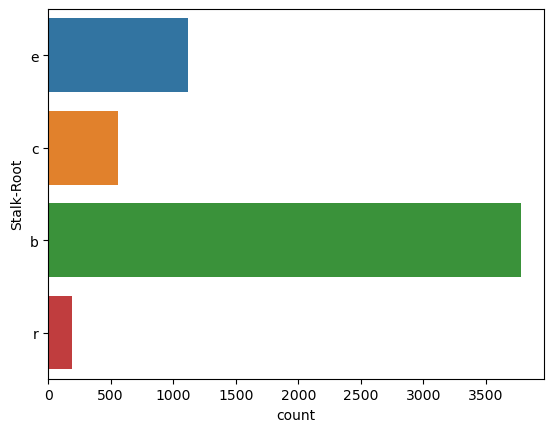

In [19]:
sns.countplot(y=Mushroom_data['Stalk-Root'])

:- number of bulbous=b is much higher than other types in stalk root and  By considering it mean we can replace all the nan values with b

In [20]:
Mushroom_data['Stalk-Root']=Mushroom_data['Stalk-Root'].fillna('b')

In [21]:
Mushroom_data.isnull().sum()

Class                        0
Cap-Shape                    0
Cap-Surface                  0
Cap-Color                    0
Bruises                      0
Odor                         0
Gill-Attachment              0
Gill-Spacing                 0
Gill-Size                    0
Gill-Color                   0
Stal-Shape                   0
Stalk-Root                   0
Stalk-Suraface-above-ring    0
Stalk-Suraface-below-ring    0
Stalk-color-above-ring       0
Stalk-color-below-ring       0
Veil-Type                    0
Veil-Color                   0
Ring-Number                  0
Ring-Type                    0
Spore-Print-Color            0
Population                   0
Habitat                      0
dtype: int64

:- hence now there are no null values in our dataframe

Getting the list names of all the features names in the dataset

In [22]:
columns = list(Mushroom_data.columns)
columns

['Class',
 'Cap-Shape',
 'Cap-Surface',
 'Cap-Color',
 'Bruises',
 'Odor',
 'Gill-Attachment',
 'Gill-Spacing',
 'Gill-Size',
 'Gill-Color',
 'Stal-Shape',
 'Stalk-Root',
 'Stalk-Suraface-above-ring',
 'Stalk-Suraface-below-ring',
 'Stalk-color-above-ring',
 'Stalk-color-below-ring',
 'Veil-Type',
 'Veil-Color',
 'Ring-Number',
 'Ring-Type',
 'Spore-Print-Color',
 'Population',
 'Habitat']

Creating countplot for each features in the dataframe

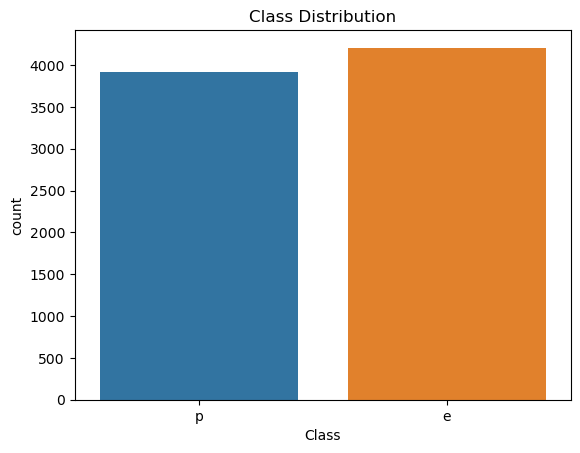

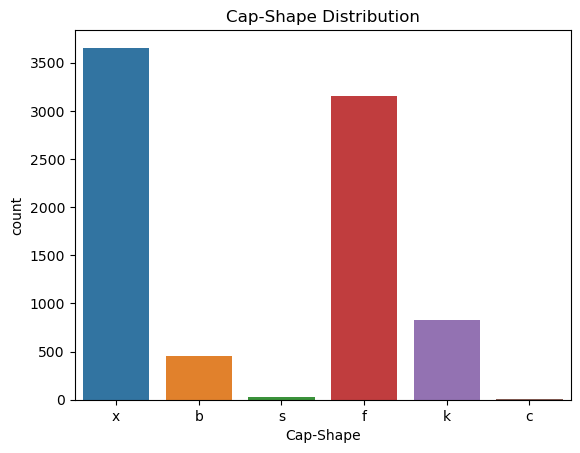

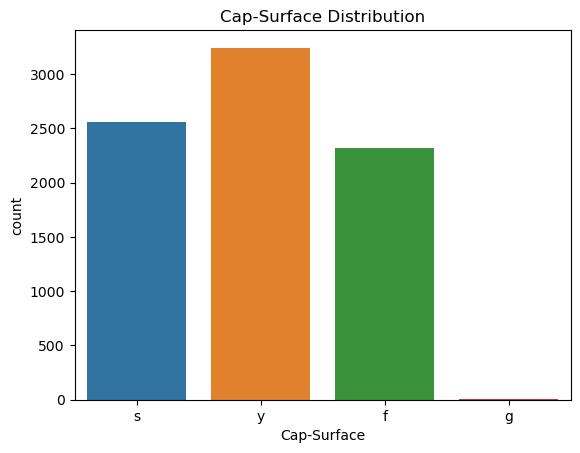

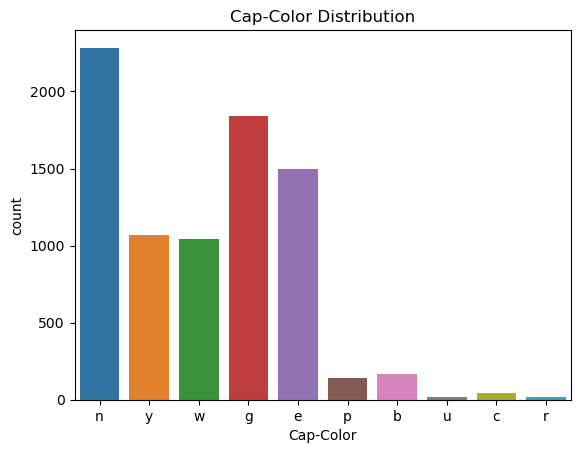

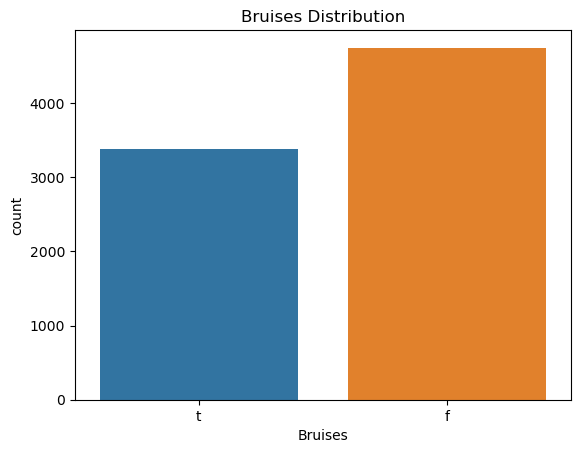

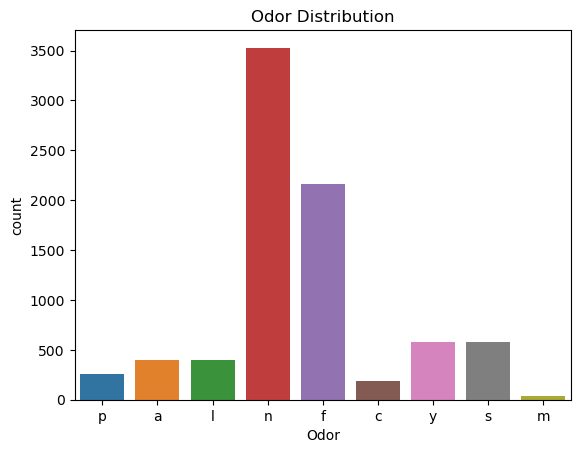

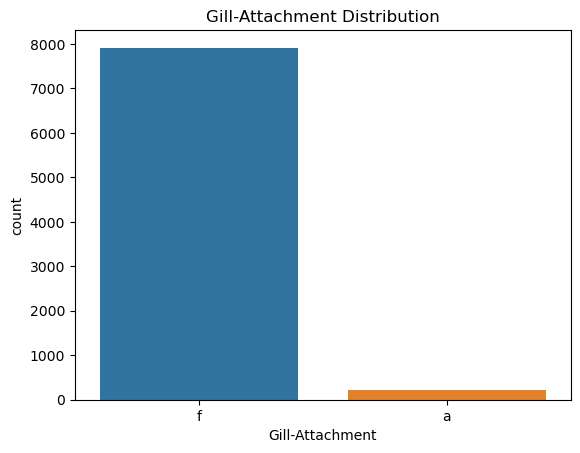

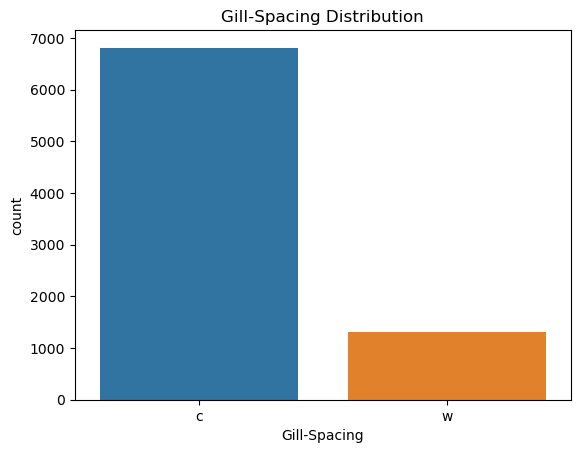

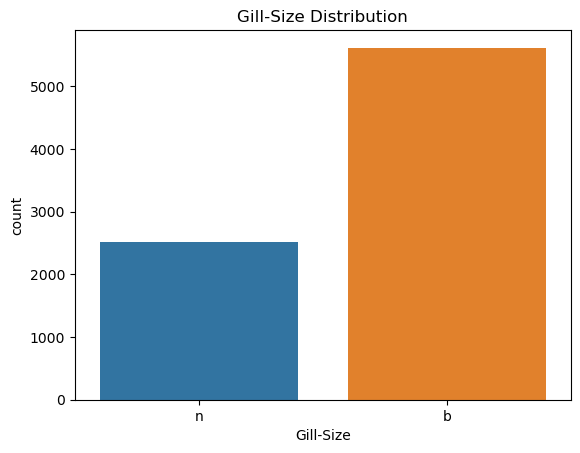

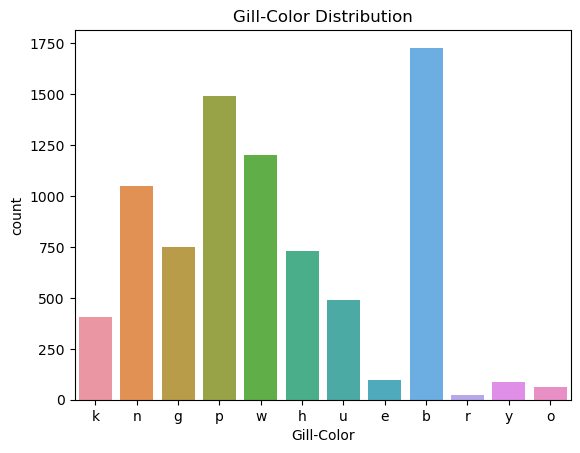

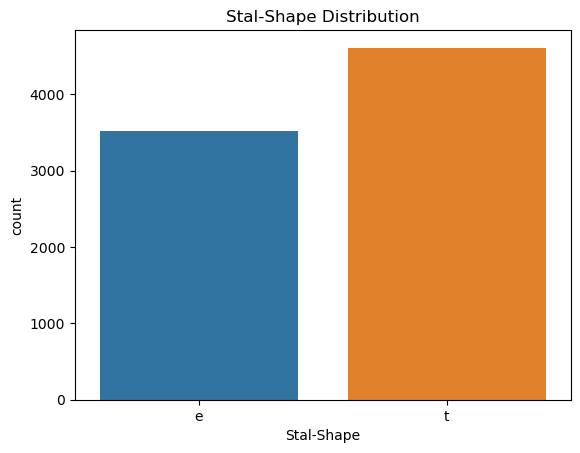

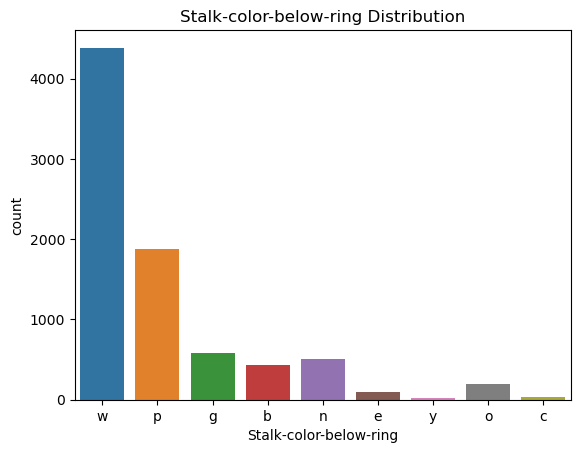

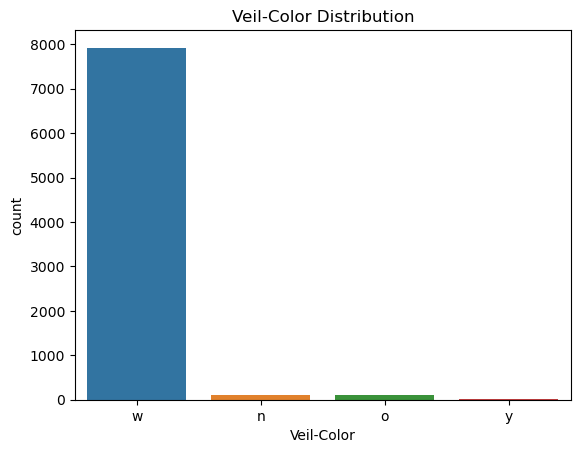

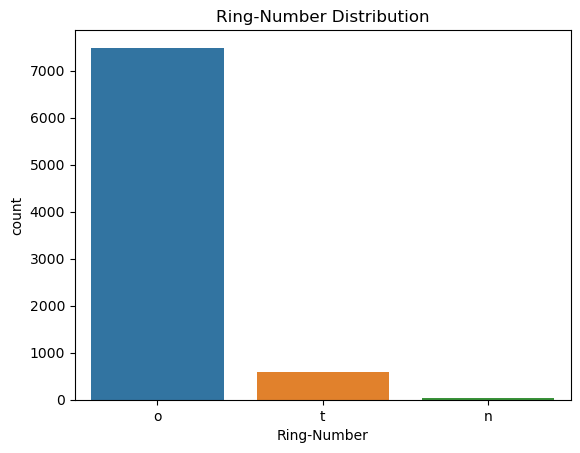

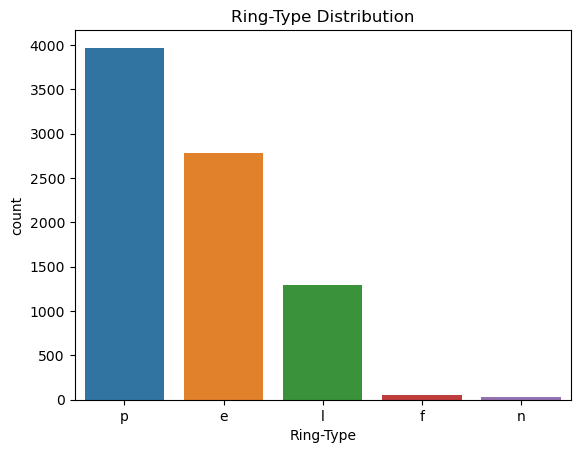

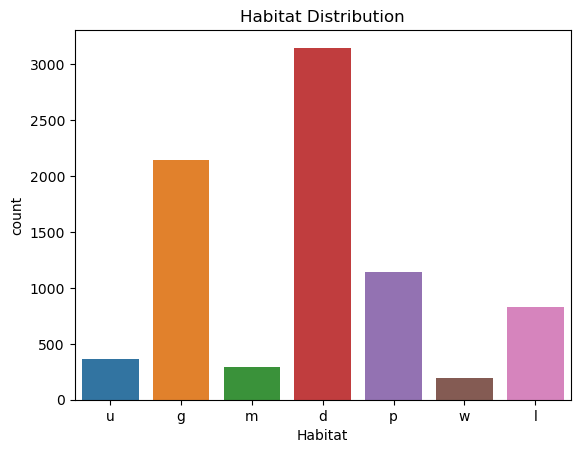

In [23]:
for column in Mushroom_data.columns:
    # If the column contains categorical data, draw a count plot using seaborn
    if Mushroom_data[column].dtype == 'object':
        sns.countplot(x=column, data=Mushroom_data)
        plt.title(f"{column} Distribution")
        plt.show()

Count Plot's Discription particular column
                          

         Class : Poisonus and edible mushrooms are of same count.
         Cap-Shape : x(convex) Cap-Shape mushrooms are more.
         Bruises: f(No), Mushrooms with no bruises are more.
         Odor : n(none) Mushrooms with no odor are more.
         Gill-size: b(Broad) Gill-size mushrooms are more.
         Gill-color: b(buff) Gill-color mushrooms are more.
         Stalk-Shape :t(tapering) Stalk-shape mushrooms are more.
         Veli-type: All mushrooms are of Partial Veli-type
         Ring Number: o(one) Ring number mushrooms are more.
         Habitat: d(wood) Habitat mushrooms are more.

Some important observation from above in our dataset no of rows with class as Poisonous and class as edible is almost same
In our data set all the mushrooms has partial Veil Type Most of the Mushrooms has habitat woods
and Mushroom with Gill color green , yellow and red are rare.

Observing Categorical features By CrossTabulation

In [24]:
pd.crosstab(index=Mushroom_data['Class'],columns='count',dropna=True)

col_0  count
Class       
e       4208
p       3916

In [25]:
pd.crosstab(index=Mushroom_data['Habitat'],columns='count',dropna=True)

col_0    count
Habitat       
d         3148
g         2148
l          832
m          292
p         1144
u          368
w          192

In [26]:
pd.crosstab(index=Mushroom_data['Habitat'],columns=Mushroom_data['Class'])

Class       e     p
Habitat            
d        1880  1268
g        1408   740
l         240   592
m         256    36
p         136  1008
u          96   272
w         192     0

Observing various categorical variable  By CrossTabulation

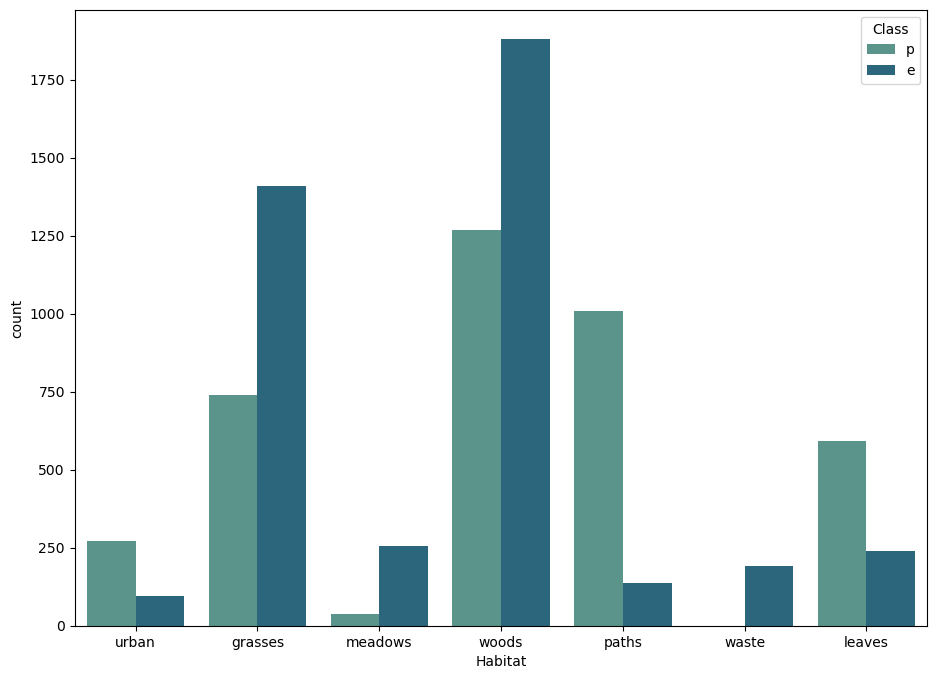

In [27]:
plt.figure(figsize=(11,8))
ax= sns.countplot(x= 'Habitat', hue='Class', data=Mushroom_data, palette='crest')
ax.set_xticklabels(['urban', 'grasses', 'meadows', 'woods', 'paths','waste','leaves'])
plt.show()

                      The above count plot is of Habitat with respect to class 

Scatterplot

<AxesSubplot:xlabel='Class', ylabel='Habitat'>

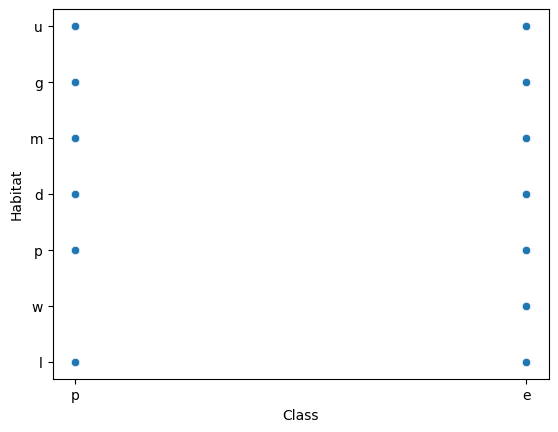

In [28]:
sns.scatterplot(data=Mushroom_data, x='Class', y='Habitat')

   :- As our data is categorical not continuous we are getting this type of scatter plot

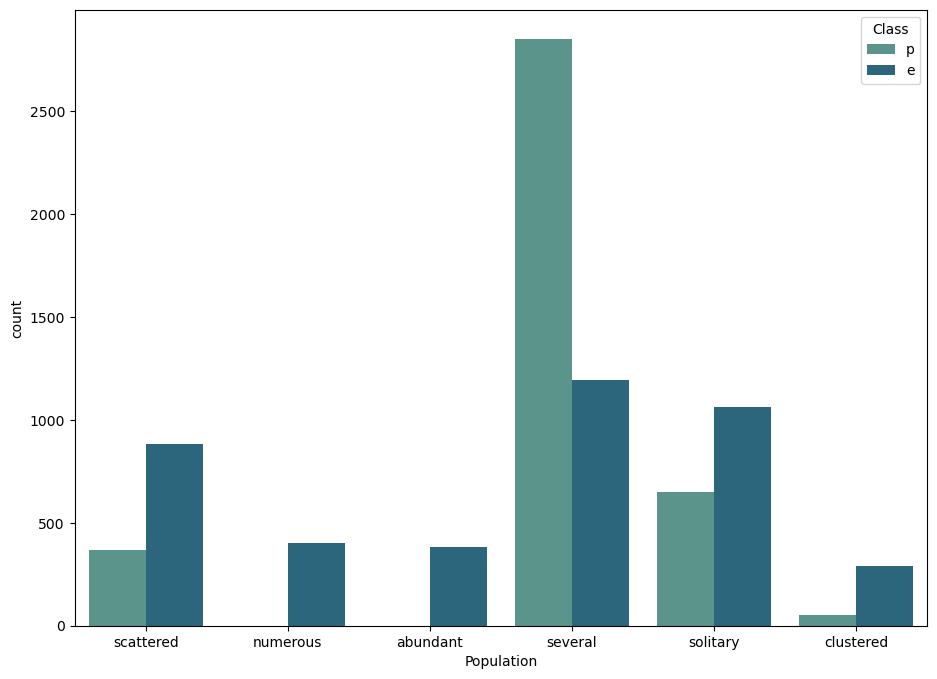

In [29]:
plt.figure(figsize=(11,8))
ax= sns.countplot(x= 'Population', hue='Class', data=Mushroom_data, palette='crest')
ax.set_xticklabels(['scattered','numerous','abundant','several','solitary','clustered'])
plt.show()

                        The above count plot is of Population with respect to class 

In [30]:
label_encoder = LabelEncoder()
for column in Mushroom_data.columns:
    Mushroom_data[column] = label_encoder.fit_transform(Mushroom_data[column])

In [31]:
Mushroom_data.head()

Class  Cap-Shape  Cap-Surface  Cap-Color  Bruises  Odor  Gill-Attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   Gill-Spacing  Gill-Size  Gill-Color  ...  Stalk-Suraface-below-ring  \
0             0          1           4  ...                          2   
1             0          0           4  ...                          2   
2             0          0           5  ...                          2   
3             0          1           5  ...                          2   
4             1          0           4  ...                          2   

   Stalk-color-above-ring  Stalk-color-below-ring  Veil-Type  Veil-Color  \
0                       7                       7          0           2   
1                       7                       7          0           2   
2                       7                       7          0           2   
3                       7                       7          0           2   
4                       7                       7          0           2   

   Ring-Number  Ring-Type  Spore-Print-Color  Population  Habitat  
0            1          4                  2           3        5  
1            1          4                  3           2        1  
2            1          4                  3           2        3  
3            1          4                  2           3        5  
4            1          0                  3           0        1  

[5 rows x 23 columns]

In [32]:
corr_matrix = Mushroom_data.corr()
corr_matrix

Class  Cap-Shape  Cap-Surface  Cap-Color  \
Class                      1.000000   0.052951     0.178446  -0.031384   
Cap-Shape                  0.052951   1.000000    -0.050454  -0.048203   
Cap-Surface                0.178446  -0.050454     1.000000  -0.019402   
Cap-Color                 -0.031384  -0.048203    -0.019402   1.000000   
Bruises                   -0.501530  -0.035374     0.070228  -0.000764   
Odor                      -0.093552  -0.021935     0.045233  -0.387121   
Gill-Attachment            0.129200   0.078865    -0.034180   0.041436   
Gill-Spacing              -0.348387   0.013196    -0.282306   0.144259   
Gill-Size                  0.540024   0.054050     0.208100  -0.169464   
Gill-Color                -0.530566  -0.006039    -0.161017   0.084659   
Stal-Shape                -0.102019   0.063794    -0.014123  -0.456496   
Stalk-Root                -0.324194   0.000962    -0.025486   0.266953   
Stalk-Suraface-above-ring -0.334593  -0.030417     0.089090  -0.060837   
Stalk-Suraface-below-ring -0.298801  -0.032591     0.107965  -0.047710   
Stalk-color-above-ring    -0.154003  -0.031659     0.066050   0.002364   
Stalk-color-below-ring    -0.146730  -0.030390     0.068885   0.008057   
Veil-Type                       NaN        NaN          NaN        NaN   
Veil-Color                 0.145142   0.072560    -0.016603   0.036130   
Ring-Number               -0.214366  -0.106534    -0.026147  -0.005822   
Ring-Type                 -0.411771  -0.025457    -0.106407   0.162513   
Spore-Print-Color          0.171961  -0.073416     0.230364  -0.293523   
Population                 0.298686   0.063413     0.021555  -0.144770   
Habitat                    0.217179  -0.042221     0.163887   0.033925   

                            Bruises      Odor  Gill-Attachment  Gill-Spacing  \
Class                     -0.501530 -0.093552         0.129200     -0.348387   
Cap-Shape                 -0.035374 -0.021935         0.078865      0.013196   
Cap-Surface                0.070228  0.045233        -0.034180     -0.282306   
Cap-Color                 -0.000764 -0.387121         0.041436      0.144259   
Bruises                    1.000000 -0.061825         0.137359     -0.299473   
Odor                      -0.061825  1.000000        -0.059590      0.063936   
Gill-Attachment            0.137359 -0.059590         1.000000      0.071489   
Gill-Spacing              -0.299473  0.063936         0.071489      1.000000   
Gill-Size                 -0.369596  0.310495         0.108984     -0.108333   
Gill-Color                 0.527120 -0.129213        -0.128567      0.100193   
Stal-Shape                 0.099364  0.459766         0.186485      0.080895   
Stalk-Root                 0.061086 -0.032269         0.066023      0.411409   
Stalk-Suraface-above-ring  0.460824  0.118617        -0.088916     -0.212359   
Stalk-Suraface-below-ring  0.458983  0.061820        -0.116177     -0.213775   
Stalk-color-above-ring     0.083538  0.174532         0.099299      0.274574   
Stalk-color-below-ring     0.092874  0.169407         0.097160      0.253505   
Veil-Type                       NaN       NaN              NaN           NaN   
Veil-Color                 0.119770 -0.057747         0.897518      0.073363   
Ring-Number                0.056788  0.111905         0.093236      0.243014   
Ring-Type                  0.692973 -0.281387        -0.146689     -0.195897   
Spore-Print-Color         -0.285008  0.469055        -0.029524      0.047323   
Population                 0.088137 -0.043623         0.165575     -0.529253   
Habitat                   -0.075095 -0.026610        -0.030304     -0.154680   

                           Gill-Size  Gill-Color  ...  \
Class                       0.540024   -0.530566  ...   
Cap-Shape                   0.054050   -0.006039  ...   
Cap-Surface                 0.208100   -0.161017  ...   
Cap-Color                  -0.169464    0.084659  ...   
Bruises                    -0.369596    0.52712

HeatMap

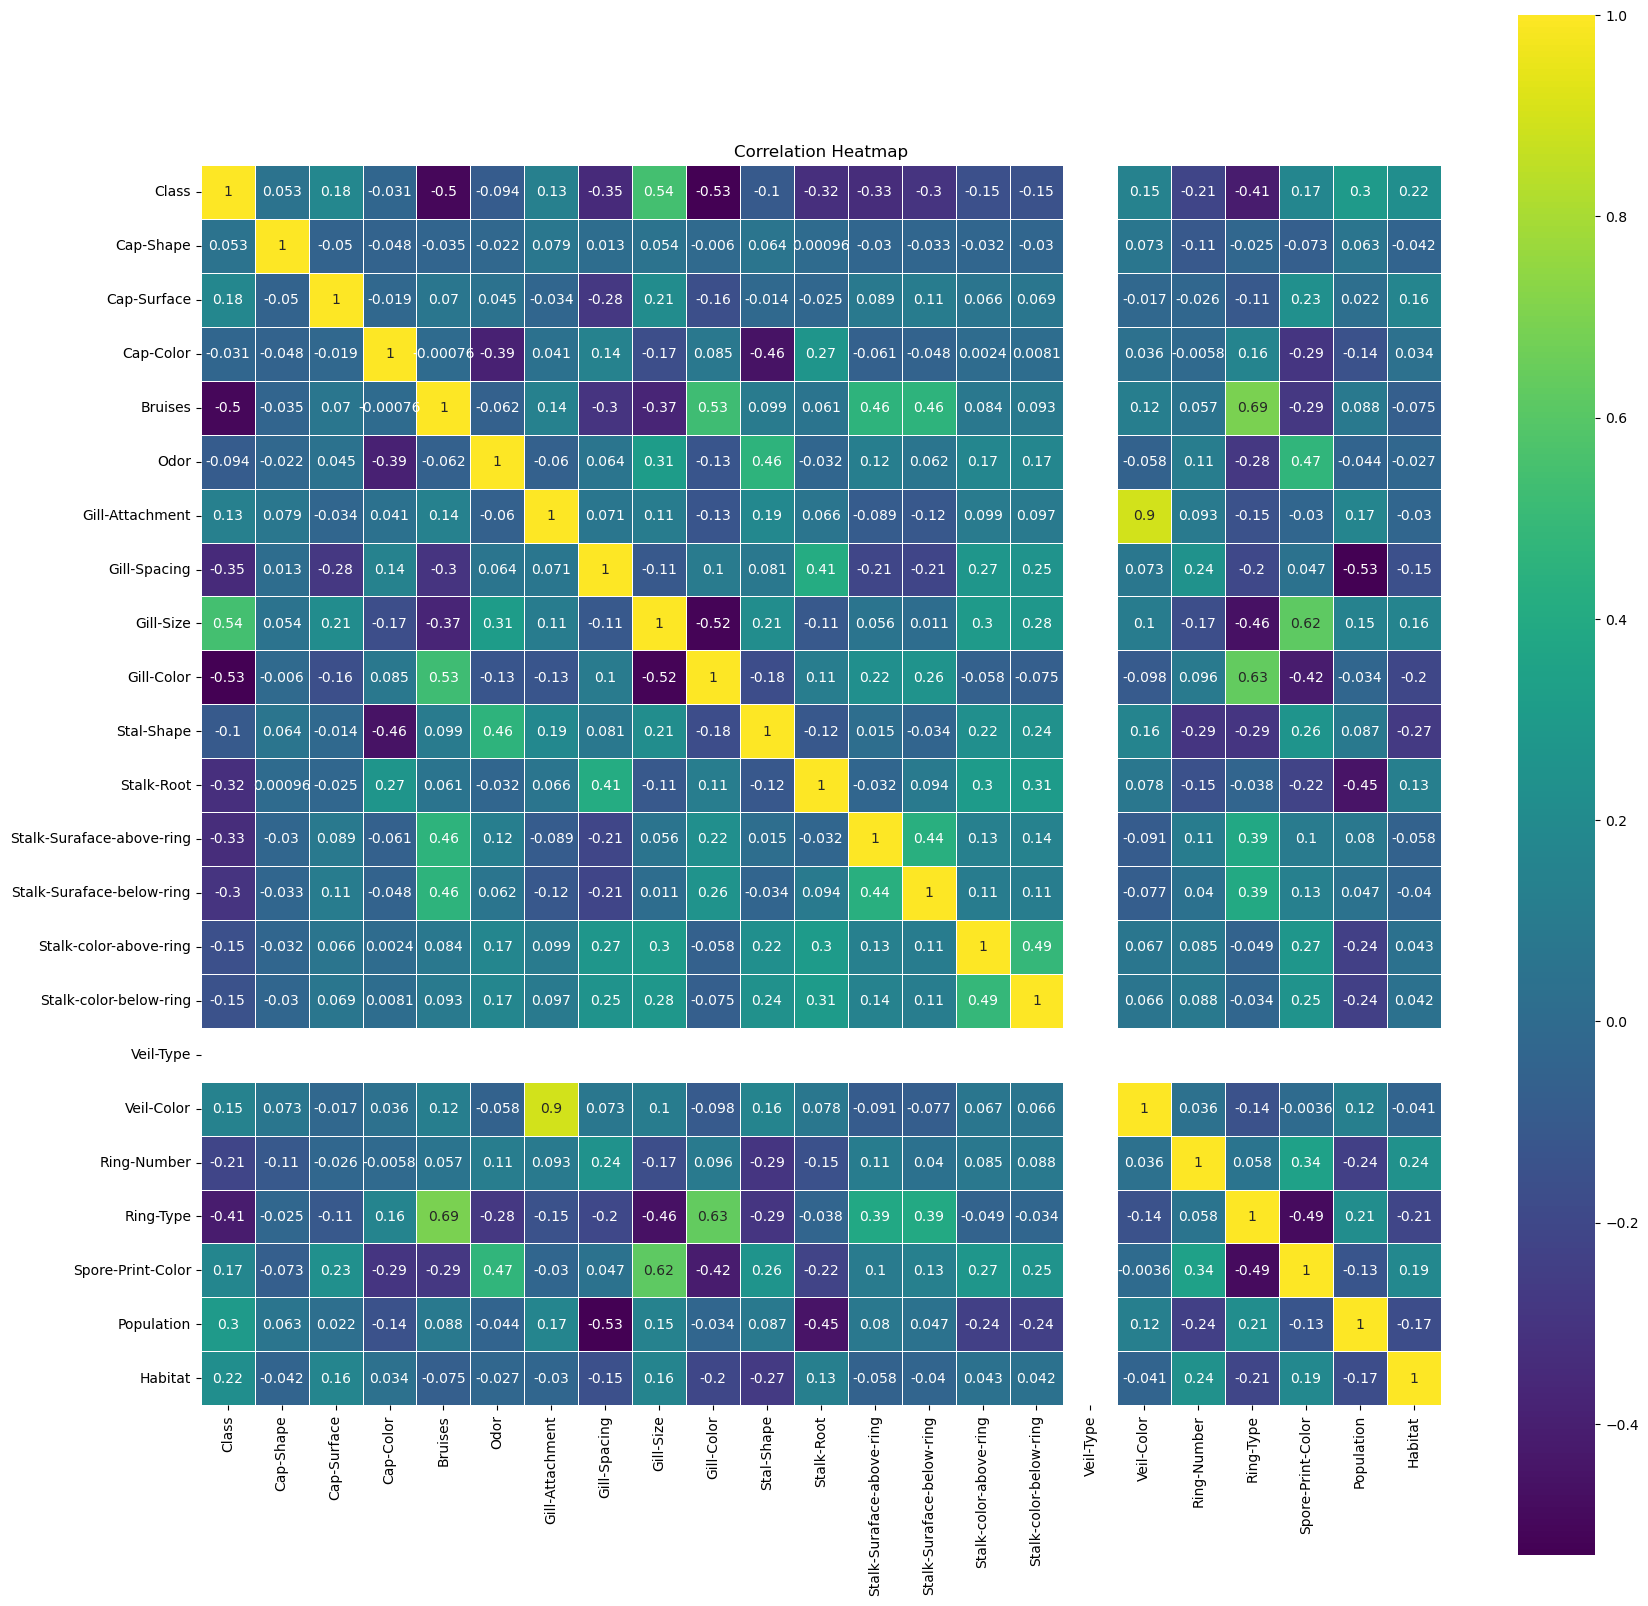

In [33]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', square=True, linewidths=.5, ax=ax)
plt.title('Correlation Heatmap')
plt.show()

From above it can be observed that features such as Cap-Color,Odor,Stalk-color-above-ring',Stalk-color-below-ring',Veil-Type,Veil-Color,Spore-Print-Color,Gill-Attachment,Cap-Shape,Cap-Surface are not much related with our target column class and features such has Gill - Color , Gill Size ,ring type are highly retaled with our data 

Removing Unwanted Columns

In [34]:
Mushroom_data_new=Mushroom_data[['Class','Bruises','Gill-Size','Gill-Spacing','Gill-Color','Habitat','Population','Stalk-Suraface-above-ring','Stalk-Suraface-below-ring']]

In [35]:
Mushroom_data_new

Class  Bruises  Gill-Size  Gill-Spacing  Gill-Color  Habitat  \
0         1        1          1             0           4        5   
1         0        1          0             0           4        1   
2         0        1          0             0           5        3   
3         1        1          1             0           5        5   
4         0        0          0             1           4        1   
...     ...      ...        ...           ...         ...      ...   
8119      0        0          0             0          11        2   
8120      0        0          0             0          11        2   
8121      0        0          0             0           5        2   
8122      1        0          1             0           0        2   
8123      0        0          0             0          11        2   

      Population  Stalk-Suraface-above-ring  Stalk-Suraface-below-ring  
0              3                          2                          2  
1              2                          2                          2  
2              2                          2                          2  
3              3                          2                          2  
4              0                          2                          2  
...          ...                        ...                        ...  
8119           1                          2                          2  
8120           4                          2                          2  
8121           1                          2                          2  
8122           4                          2                          1  
8123           1                          2                          2  

[8124 rows x 9 columns]

Outliers

Text(0, 0.5, 'Value')

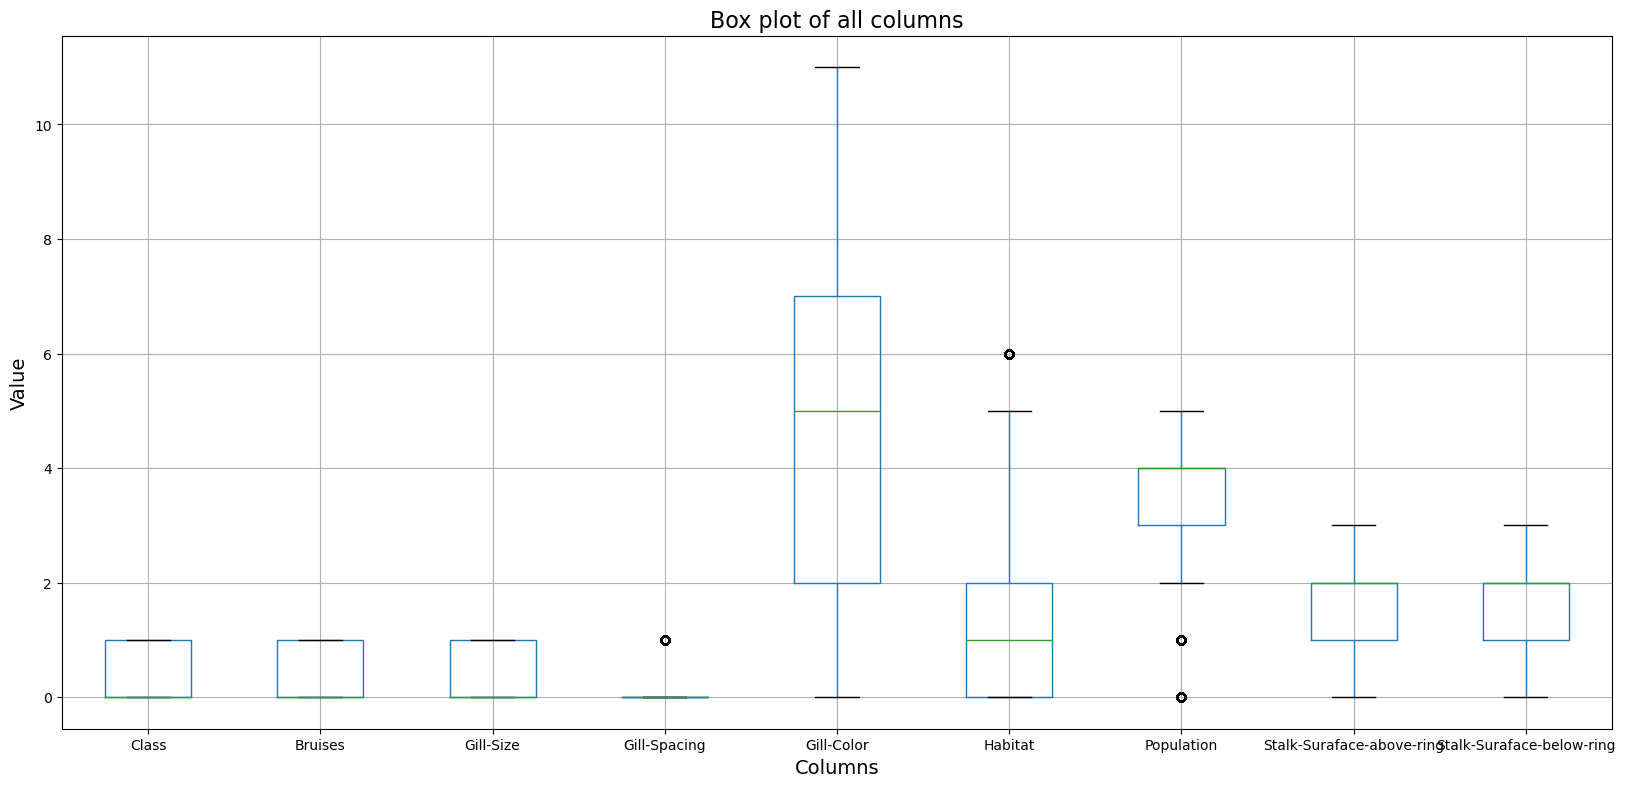

In [36]:
plt.figure(figsize=(20, 9))
Mushroom_data_new.boxplot()
plt.title('Box plot of all columns', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Value', fontsize=14)

From above we can observe that there are almost no outliers in  our dataset there are few in Gill-Spacing,Habitat,Population which can be removed 

In [37]:
Mushroom_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Class                      8124 non-null   int64
 1   Bruises                    8124 non-null   int64
 2   Gill-Size                  8124 non-null   int64
 3   Gill-Spacing               8124 non-null   int64
 4   Gill-Color                 8124 non-null   int64
 5   Habitat                    8124 non-null   int64
 6   Population                 8124 non-null   int64
 7   Stalk-Suraface-above-ring  8124 non-null   int64
 8   Stalk-Suraface-below-ring  8124 non-null   int64
dtypes: int64(9)
memory usage: 571.3 KB


In [38]:
Mushroom_data_new=Mushroom_data_new[Mushroom_data_new['Gill-Spacing']<=0.5]

In [39]:
Mushroom_data_new=Mushroom_data_new[Mushroom_data_new['Population']>2]

Text(0, 0.5, 'Value')

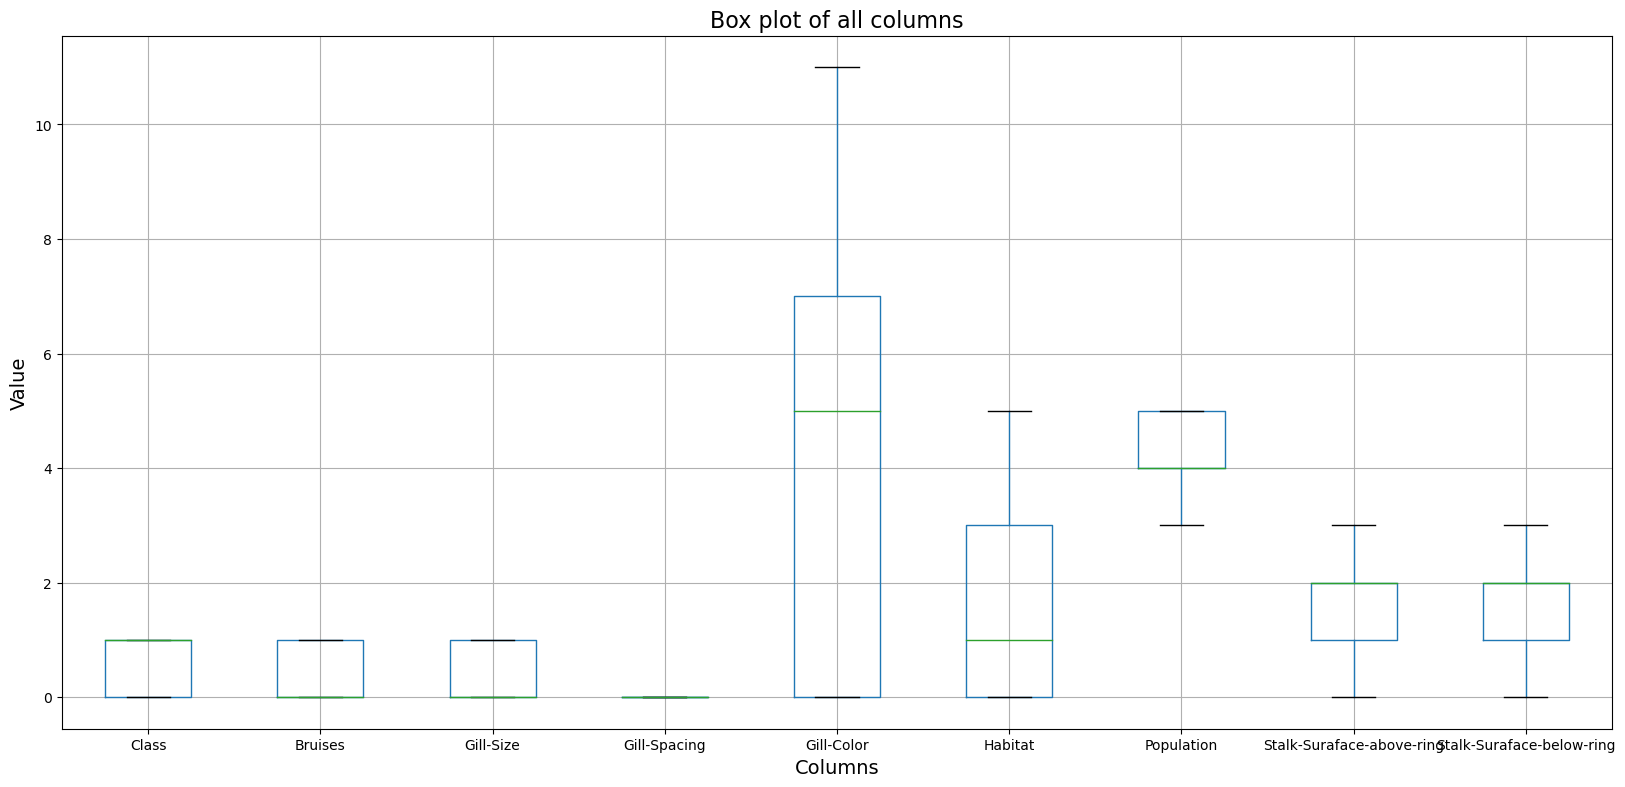

In [40]:
plt.figure(figsize=(20, 9))
Mushroom_data_new.boxplot()
plt.title('Box plot of all columns', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Value', fontsize=14)

From above we can observe that there are  no outliers in our dataset, all the outliers are removed

Pairplot

In [41]:
target_feature = 'Class'

In [42]:
# Select the columns to include in the pairplot
plot_cols = ['Bruises', 'Gill-Size', 'Gill-Spacing', 'Gill-Color','Habitat','Population','Stalk-Suraface-above-ring','Stalk-Suraface-below-ring', target_feature]

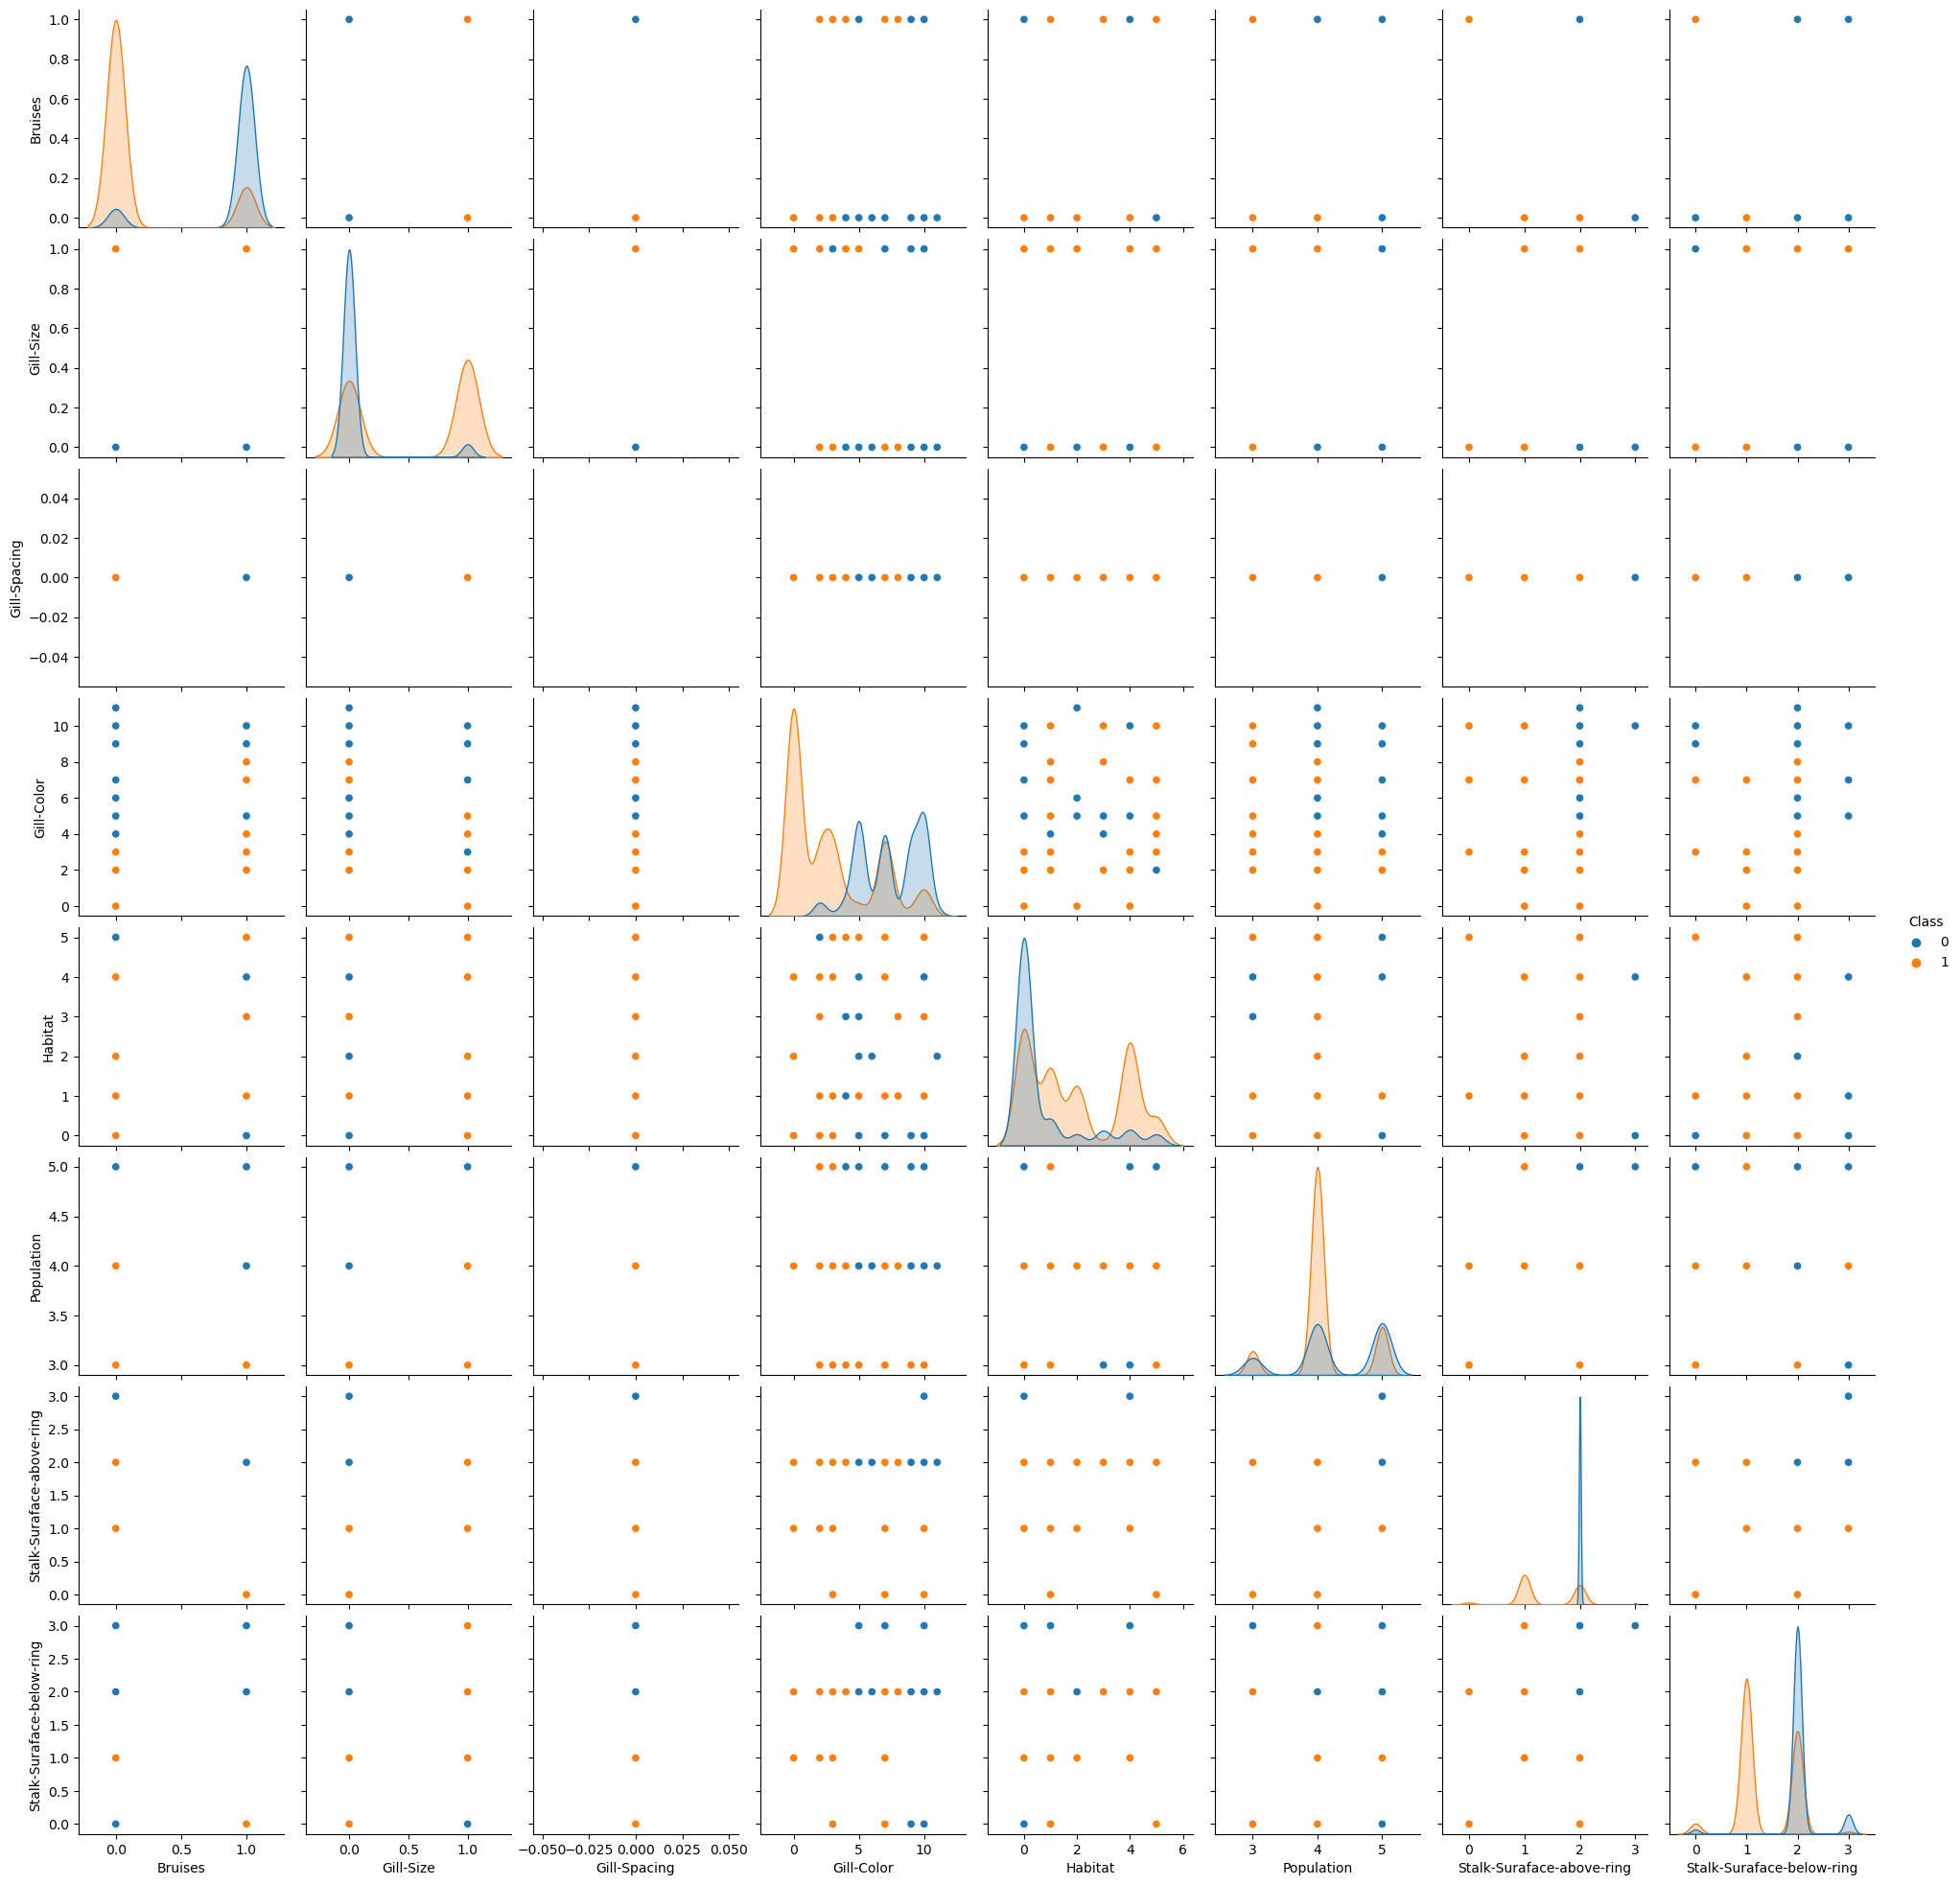

In [43]:
# Draw the pairplot
sns.pairplot(Mushroom_data_new[plot_cols], hue=target_feature)

slicing the dataframe based on column_name value

In [45]:
Edible_Mushroom_data = Mushroom_data_new[Mushroom_data_new['Class'] == 1]

In [46]:
Edible_Mushroom_data

Class  Bruises  Gill-Size  Gill-Spacing  Gill-Color  Habitat  \
0         1        1          1             0           4        5   
3         1        1          1             0           5        5   
8         1        1          1             0           7        1   
13        1        1          1             0           4        5   
17        1        1          1             0           5        1   
...     ...      ...        ...           ...         ...      ...   
8113      1        0          1             0           0        0   
8116      1        0          1             0           0        2   
8117      1        0          1             0           0        0   
8118      1        0          1             0           0        0   
8122      1        0          1             0           0        2   

      Population  Stalk-Suraface-above-ring  Stalk-Suraface-below-ring  
0              3                          2                          2  
3              3                          2                          2  
8              4                          2                          2  
13             4                          2                          2  
17             3                          2                          2  
...          ...                        ...                        ...  
8113           4                          1                          1  
8116           4                          2                          1  
8117           4                          1                          2  
8118           4                          1                          2  
8122           4                          2                          1  

[3768 rows x 9 columns]

:-From above we get data of the Edible Mushroom 

Converting the DataFrame to Matrix form

In [47]:
matrix_edible = Edible_Mushroom_data.values

# print the matrix
print(matrix_edible)

[[1 1 1 ... 3 2 2]
 [1 1 1 ... 3 2 2]
 [1 1 1 ... 4 2 2]
 ...
 [1 0 1 ... 4 1 2]
 [1 0 1 ... 4 1 2]
 [1 0 1 ... 4 2 1]]


:- So by this edible Mushroom data frame is converted into a matrix form

In [48]:
array_edible_mushroom=np.array(matrix_edible)

In [49]:
array_edible_mushroom

array([[1, 1, 1, ..., 3, 2, 2],
       [1, 1, 1, ..., 3, 2, 2],
       [1, 1, 1, ..., 4, 2, 2],
       ...,
       [1, 0, 1, ..., 4, 1, 2],
       [1, 0, 1, ..., 4, 1, 2],
       [1, 0, 1, ..., 4, 2, 1]])

Slicing the data 

In [50]:
data1 = pd.DataFrame(Mushroom_data_new, columns=['Class','Gill-Color','Gill-Size'])
data1

Class  Gill-Color  Gill-Size
0         1           4          1
3         1           5          1
7         0           5          0
8         1           7          1
9         0           2          0
...     ...         ...        ...
8116      1           0          1
8117      1           0          1
8118      1           0          1
8120      0          11          0
8122      1           0          1

[6232 rows x 3 columns]

Slicing the data till 4000

In [51]:
rowslice = data1.iloc[0:4000]
rowslice

Class  Gill-Color  Gill-Size
0         1           4          1
3         1           5          1
7         0           5          0
8         1           7          1
9         0           2          0
...     ...         ...        ...
5311      1          10          1
5312      1           0          1
5314      1           3          0
5315      1           7          0
5317      1           2          0

[4000 rows x 3 columns]

Slicing the half dataset

In [52]:
rowslice1 = data1.iloc[4000:]
rowslice1

Class  Gill-Color  Gill-Size
5319      1           2          0
5320      1           3          0
5321      1           0          1
5322      1           3          0
5323      1          10          0
...     ...         ...        ...
8116      1           0          1
8117      1           0          1
8118      1           0          1
8120      0          11          0
8122      1           0          1

[2232 rows x 3 columns]

Merging two sliced rows

In [53]:
merger = pd.concat([rowslice,rowslice1], axis='rows')
merger

Class  Gill-Color  Gill-Size
0         1           4          1
3         1           5          1
7         0           5          0
8         1           7          1
9         0           2          0
...     ...         ...        ...
8116      1           0          1
8117      1           0          1
8118      1           0          1
8120      0          11          0
8122      1           0          1

[6232 rows x 3 columns]

 Using conditions and segregate the data based on the condition 

In [54]:
Condition1=merger[merger['Gill-Color']==10]
Condition1

Class  Gill-Color  Gill-Size
12        0          10          0
37        1          10          1
49        0          10          0
50        0          10          0
55        0          10          0
...     ...         ...        ...
7965      0          10          0
7984      0          10          0
7986      0          10          0
8001      0          10          0
8038      0          10          0

[836 rows x 3 columns]

In [55]:
Condition2 = merger[(merger['Class']==0) & (merger['Gill-Size']==1)]
Condition2 

Class  Gill-Color  Gill-Size
15        0           4          1
28        0           4          1
36        0           4          1
42        0           2          1
60        0           4          1
...     ...         ...        ...
5895      0           7          1
5948      0           7          1
5970      0           9          1
5980      0          10          1
5997      0           7          1

[144 rows x 3 columns]

Mathematical Function

Calculating mean for all columns of Mushroom Dataset

In [56]:
Mushroom_data_new

Class  Bruises  Gill-Size  Gill-Spacing  Gill-Color  Habitat  \
0         1        1          1             0           4        5   
3         1        1          1             0           5        5   
7         0        1          0             0           5        3   
8         1        1          1             0           7        1   
9         0        1          0             0           2        3   
...     ...      ...        ...           ...         ...      ...   
8116      1        0          1             0           0        2   
8117      1        0          1             0           0        0   
8118      1        0          1             0           0        0   
8120      0        0          0             0          11        2   
8122      1        0          1             0           0        2   

      Population  Stalk-Suraface-above-ring  Stalk-Suraface-below-ring  
0              3                          2                          2  
3              3                          2                          2  
7              3                          2                          2  
8              4                          2                          2  
9              3                          2                          2  
...          ...                        ...                        ...  
8116           4                          2                          1  
8117           4                          1                          2  
8118           4                          1                          2  
8120           4                          2                          2  
8122           4                          2                          1  

[6232 rows x 9 columns]

In [57]:
Mushroom_data_new.mean()

Class                        0.604621
Bruises                      0.453145
Gill-Size                    0.362003
Gill-Spacing                 0.000000
Gill-Color                   4.529525
Habitat                      1.478819
Population                   4.166881
Stalk-Suraface-above-ring    1.604621
Stalk-Suraface-below-ring    1.630295
dtype: float64

Calculating Sum for all columns of Mushroom Dataset

In [58]:
Mushroom_data_new.sum()

Class                         3768
Bruises                       2824
Gill-Size                     2256
Gill-Spacing                     0
Gill-Color                   28228
Habitat                       9216
Population                   25968
Stalk-Suraface-above-ring    10000
Stalk-Suraface-below-ring    10160
dtype: int64

Calculating Median for all columns of Mushroom Dataset

In [59]:
Mushroom_data_new.median()

Class                        1.0
Bruises                      0.0
Gill-Size                    0.0
Gill-Spacing                 0.0
Gill-Color                   5.0
Habitat                      1.0
Population                   4.0
Stalk-Suraface-above-ring    2.0
Stalk-Suraface-below-ring    2.0
dtype: float64

Counting the Species for particular column

In [60]:
Mushroom_data_new['Class'].value_counts()

1    3768
0    2464
Name: Class, dtype: int64

Describe Function

In [61]:
Mushroom_data_new.describe()

Class      Bruises    Gill-Size  Gill-Spacing   Gill-Color  \
count  6232.000000  6232.000000  6232.000000        6232.0  6232.000000   
mean      0.604621     0.453145     0.362003           0.0     4.529525   
std       0.488971     0.497840     0.480618           0.0     3.663431   
min       0.000000     0.000000     0.000000           0.0     0.000000   
25%       0.000000     0.000000     0.000000           0.0     0.000000   
50%       1.000000     0.000000     0.000000           0.0     5.000000   
75%       1.000000     1.000000     1.000000           0.0     7.000000   
max       1.000000     1.000000     1.000000           0.0    11.000000   

           Habitat   Population  Stalk-Suraface-above-ring  \
count  6232.000000  6232.000000                6232.000000   
mean      1.478819     4.166881                   1.604621   
std       1.746363     0.595609                   0.538933   
min       0.000000     3.000000                   0.000000   
25%       0.000000     4.000000                   1.000000   
50%       1.000000     4.000000                   2.000000   
75%       3.000000     5.000000                   2.000000   
max       5.000000     5.000000                   3.000000   

       Stalk-Suraface-below-ring  
count                6232.000000  
mean                    1.630295  
std                     0.609690  
min                     0.000000  
25%                     1.000000  
50%                     2.000000  
75%                     2.000000  
max                     3.000000

:-From above we can say that dataset have more Broad types of Mushroom

In [62]:
def Mushroom_filter_data(Mushroom_data, *args, **kwargs):
    for arg in args:
        Mushroom_data = Mushroom_data[Mushroom_data['Class'] == arg]
    for key, value in kwargs.items():
        Mushroom_data = Mushroom_data[Mushroom_data[key] == value]
    return Mushroom_data

In [63]:
# Filter the data to show only edible mushrooms with Habitat as Urban 
Mushroom_filter_df = Mushroom_filter_data(Mushroom_data, 1, Habitat=5)

In [64]:
Mushroom_filter_df

Class  Cap-Shape  Cap-Surface  Cap-Color  Bruises  Odor  \
0         1          5            2          4        1     6   
3         1          5            3          8        1     6   
13        1          5            3          8        1     6   
18        1          5            3          8        1     6   
19        1          5            2          4        1     6   
...     ...        ...          ...        ...      ...   ...   
5946      1          5            2          0        1     2   
5975      1          5            2          0        1     2   
5981      1          2            2          8        1     2   
5988      1          2            2          8        1     2   
5998      1          2            2          0        1     2   

      Gill-Attachment  Gill-Spacing  Gill-Size  Gill-Color  ...  \
0                   1             0          1           4  ...   
3                   1             0          1           5  ...   
13                  1             0          1           4  ...   
18                  1             0          1           5  ...   
19                  1             0          1           4  ...   
...               ...           ...        ...         ...  ...   
5946                1             0          0           3  ...   
5975                1             0          0          10  ...   
5981                1             0          0          10  ...   
5988                1             0          0           3  ...   
5998                1             0          0           7  ...   

      Stalk-Suraface-below-ring  Stalk-color-above-ring  \
0                             2                       7   
3                             2                       7   
13                            2                       7   
18                            2                       7   
19                            2                       7   
...                         ...                     ...   
5946                          0                       7   
5975                          2                       7   
5981                          2                       7   
5988                          0                       7   
5998                          0                       7   

      Stalk-color-below-ring  Veil-Type  Veil-Color  Ring-Number  Ring-Type  \
0                          7          0           2            1          4   
3                          7          0           2            1          4   
13                         7          0           2            1          4   
18                         7          0           2            1          4   
19                         7          0           2            1          4   
...                      ...        ...         ...          ...        ...   
5946                       7          0           2            1          4   
5975                       7          0           2            1          4   
5981                       7          0           2            1          4   
5988                       7          0           2            1          4   
5998                       7          0           2            1          4   

      Spore-Print-Color  Population  Habitat  
0                     2           3        5  
3                     2           3        5  
13                    3           4        5  
18                    3           3        5  
19                    3           3        5  
...                 ...         ...      ...  
5946                  1           4        5  
5975                  1           4        5  
5981                  1           3        5  
5988                  1           3        5  
5998                  1           4        5  

[272 rows x 23 columns]

In [65]:
# So here we have use *args and **kwargs function to choose Class with 1 i.e Poisonus and habitat with 5 i.e u

# Unstructure Data

In [66]:
image = Image.open("/Users/chandanithumar/Desktop/Scalable/Images/eg.jpg")

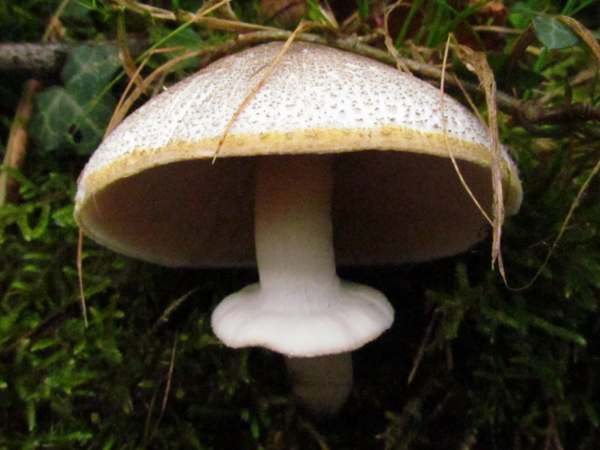

In [67]:
image

In [68]:
image_array = np.array(image)

In [69]:
image_array

array([[[35, 47,  9],
        [38, 50, 12],
        [40, 51, 17],
        ...,
        [24, 27,  6],
        [23, 26,  5],
        [22, 25,  4]],

       [[36, 48,  8],
        [39, 51, 13],
        [42, 54, 18],
        ...,
        [17, 20,  0],
        [16, 19,  0],
        [15, 18,  0]],

       [[35, 47,  7],
        [39, 51, 11],
        [44, 56, 18],
        ...,
        [13, 16,  0],
        [12, 15,  0],
        [12, 15,  0]],

       ...,

       [[36, 37,  6],
        [41, 42, 11],
        [48, 48, 20],
        ...,
        [ 8,  4,  1],
        [ 8,  4,  1],
        [ 8,  4,  1]],

       [[42, 53, 10],
        [45, 56, 13],
        [51, 62, 19],
        ...,
        [ 8,  9,  4],
        [ 7,  8,  3],
        [ 6,  7,  2]],

       [[44, 55, 12],
        [45, 56, 13],
        [50, 61, 18],
        ...,
        [ 8,  9,  4],
        [ 7,  8,  3],
        [ 6,  7,  2]]], dtype=uint8)

In [70]:
image_array.ndim

3

In [71]:
image_array.shape

(450, 600, 3)

In [72]:
# The shape (450, 600, 3) represents a three-dimensional array with 450 rows, 600 columns, and 3 represents the number of color channels .

In [73]:
# Finding maximum value

In [74]:
image_array.max()

255

In [75]:
# Aggregate
image_array.sum()

48454800

In [76]:
#Slicing NumPy Array

In [77]:
Mushroom_slice=image_array[100::5]

In [78]:
Mushroom_slice = Image.fromarray(Mushroom_slice)

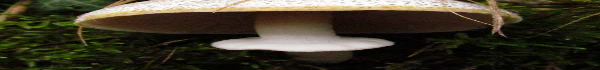

In [79]:
Mushroom_slice

In [80]:
# It will select the subset starting from index 100 and selecting every 5th element.

In [81]:
folder_path = '/Users/chandanithumar/Desktop/Scalable/Images'

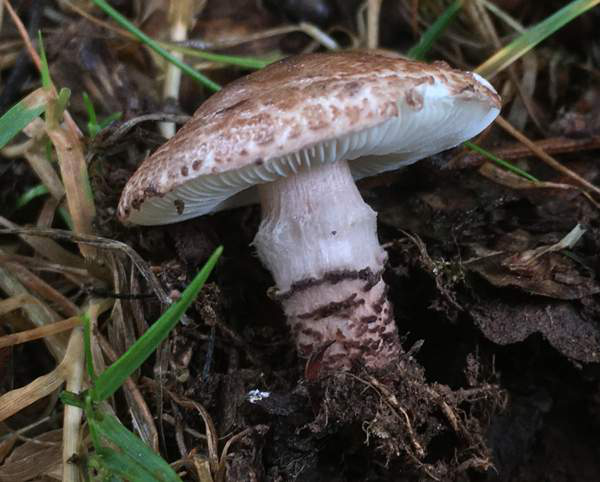

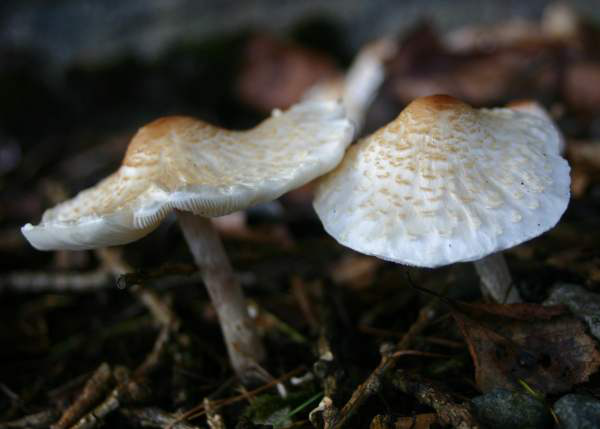

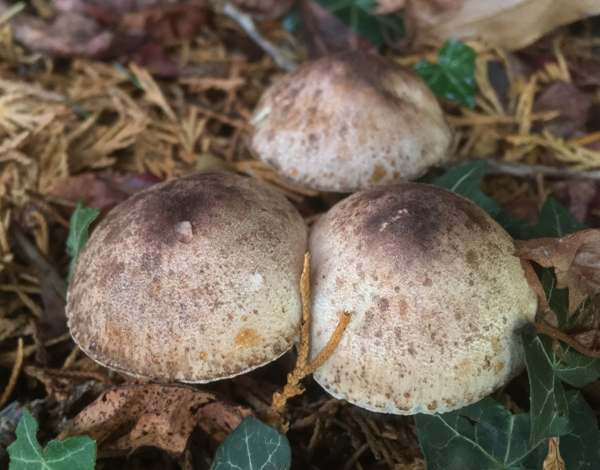

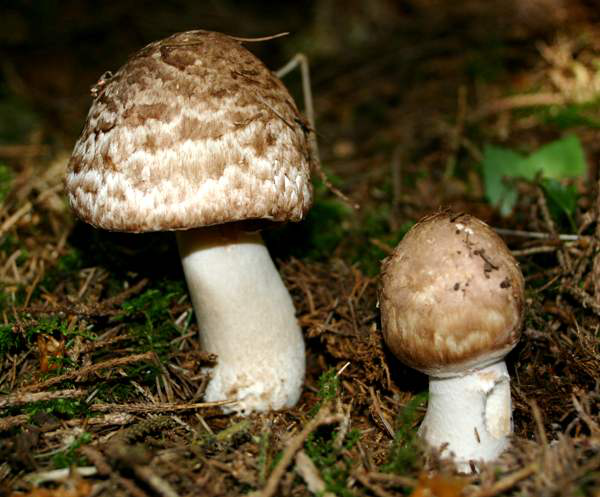

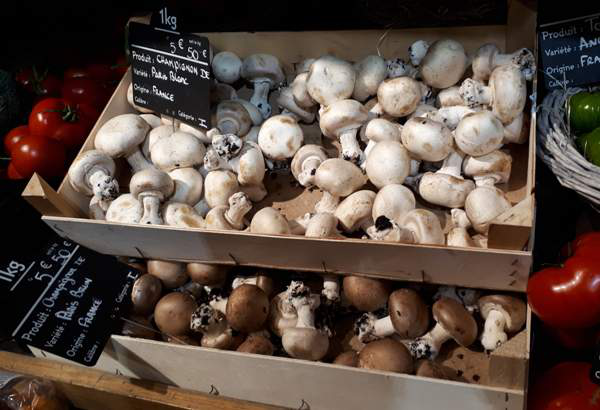

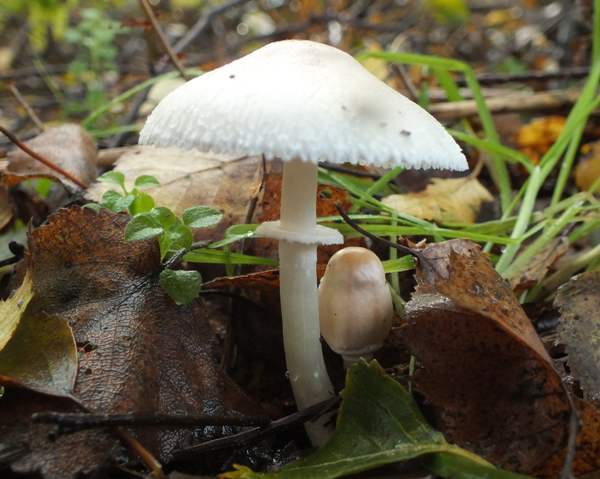

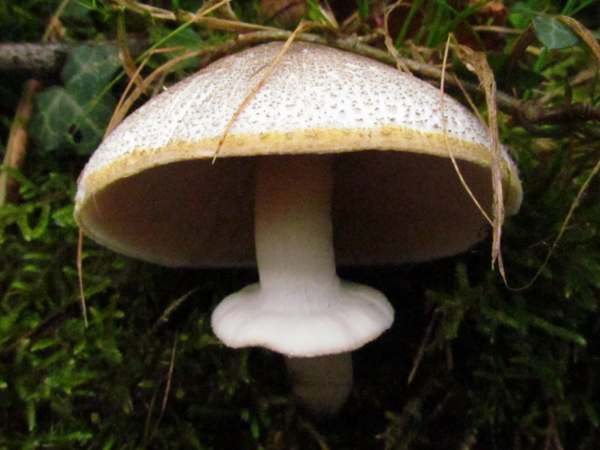

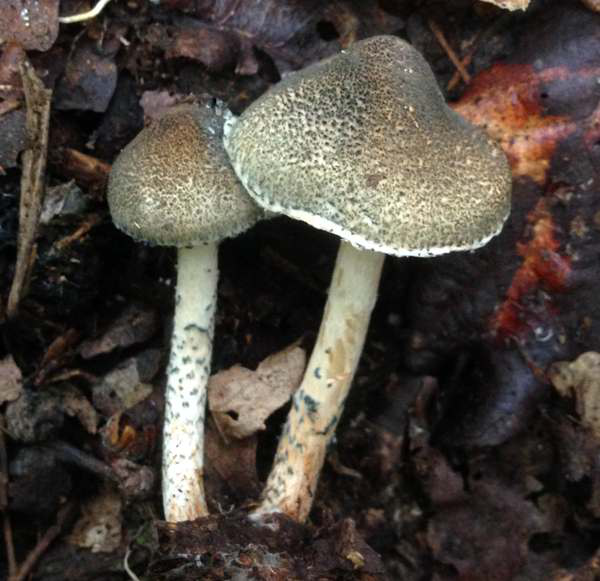

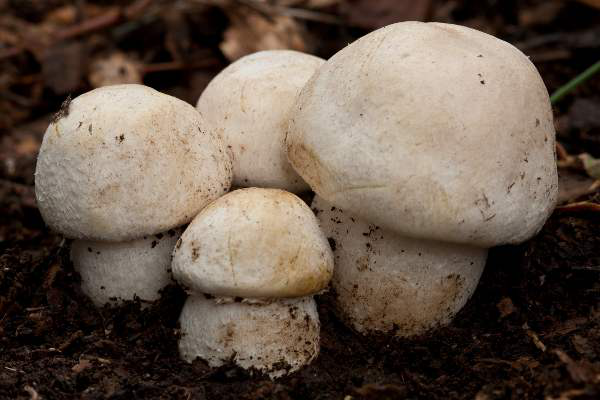

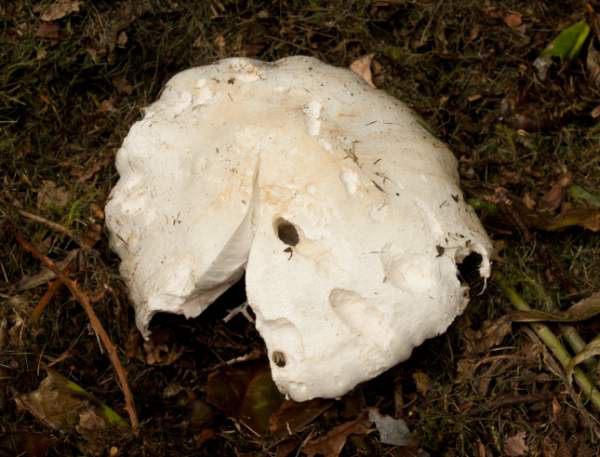

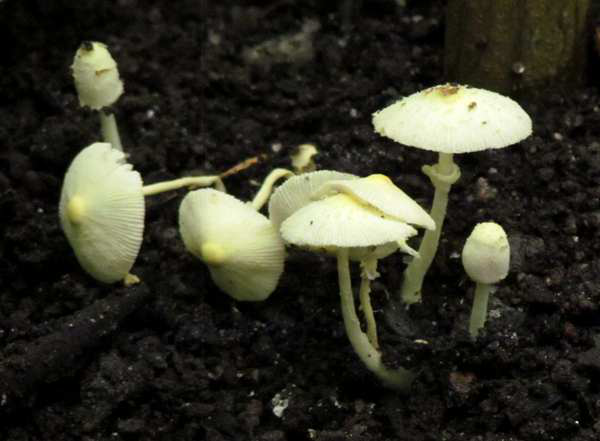

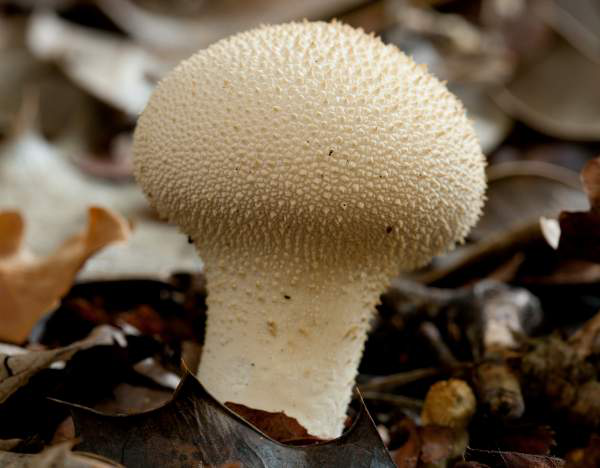

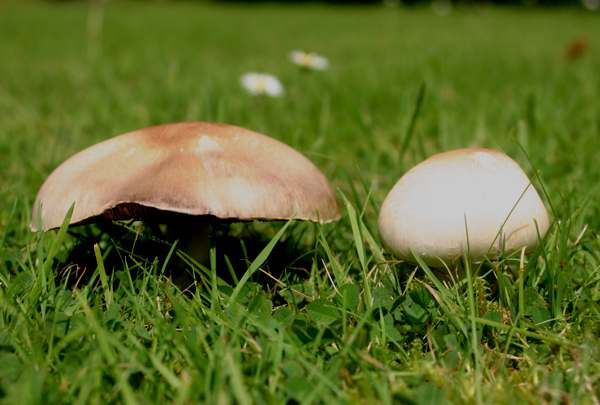

In [82]:
for filename in os.listdir(folder_path):
    if filename.endswith('.png') or filename.endswith('.jpg'): # Only consider files with these extensions
        image_path = os.path.join(folder_path, filename)
        img = Image.open(image_path)
        display(img)

In [83]:
images = [] # list to store the numpy arrays

for filename in os.listdir(folder_path):
    if filename.endswith('.png') or filename.endswith('.jpg'): # Only consider files with these extensions
        image_path = os.path.join(folder_path, filename)
        img = Image.open(image_path)
        img_array = np.array(img)
        images.append(img_array)

In [84]:
images

[array([[[161, 144, 134],
         [159, 141, 129],
         [149, 130, 116],
         ...,
         [194, 181, 129],
         [190, 176, 129],
         [179, 164, 121]],
 
        [[160, 143, 133],
         [156, 138, 126],
         [145, 126, 112],
         ...,
         [188, 176, 128],
         [176, 163, 119],
         [161, 148, 106]],
 
        [[158, 141, 131],
         [151, 133, 121],
         [138, 119, 105],
         ...,
         [164, 152, 110],
         [137, 125,  85],
         [114, 101,  66]],
 
        ...,
 
        [[ 60,  44,  29],
         [ 66,  50,  35],
         [ 73,  57,  42],
         ...,
         [ 20,  16,  15],
         [ 20,  16,  15],
         [ 20,  16,  15]],
 
        [[ 66,  50,  35],
         [ 66,  50,  35],
         [ 71,  55,  40],
         ...,
         [ 23,  19,  18],
         [ 22,  18,  17],
         [ 21,  17,  16]],
 
        [[ 60,  44,  29],
         [ 60,  44,  29],
         [ 65,  49,  34],
         ...,
         [ 23,  19,  18],
  

In [85]:
df_images=pd.DataFrame(images,columns=['Image'])

In [86]:
df_images

Image
0   [[[161, 144, 134], [159, 141, 129], [149, 130,...
1   [[[14, 19, 23], [14, 19, 23], [13, 18, 22], [1...
2   [[[104, 90, 89], [98, 84, 83], [89, 75, 74], [...
3   [[[0, 3, 0], [0, 4, 0], [0, 4, 0], [0, 5, 1], ...
4   [[[2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2], ...
5   [[[135, 144, 51], [134, 143, 50], [133, 143, 4...
6   [[[35, 47, 9], [38, 50, 12], [40, 51, 17], [37...
7   [[[120, 108, 112], [120, 108, 112], [118, 106,...
8   [[[80, 52, 41], [79, 51, 40], [76, 49, 38], [7...
9   [[[30, 22, 11], [34, 26, 15], [38, 30, 19], [3...
10  [[[64, 65, 60], [52, 53, 48], [36, 37, 32], [2...
11  [[[57, 40, 24], [56, 39, 23], [55, 38, 22], [5...
12  [[[93, 95, 20], [93, 95, 20], [93, 95, 20], [9...